In [ ]:
from google.colab import files
uploaded = files.upload()
print(uploaded)

Saving BIKE DETAILS.csv to BIKE DETAILS.csv
{'BIKE DETAILS.csv': b"name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price\r\nRoyal Enfield Classic 350,175000,2019,Individual,1st owner,350,\r\nHonda Dio,45000,2017,Individual,1st owner,5650,\r\nRoyal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114\r\nYamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643\r\nYamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,\r\nHonda CB Twister,18000,2010,Individual,1st owner,60000,53857\r\nHonda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719\r\nRoyal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,\r\nHero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,\r\nBajaj Discover 125,50000,2016,Individual,1st owner,42000,60122\r\nYamaha FZ16,35000,2015,Individual,1st owner,32000,78712\r\nHonda Navi,28000,2016,Individual,2nd owner,10000,47255\r\nBajaj Avenger Street 220,80000,2018,Individual,1st o

#Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.

In [ ]:
# Import pandas
import pandas as pd

# Read the dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Display the first 10 rows
df.head(10)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


#

#Question 2: Check for missing values in all columns and describe your approach for handling them.


In [ ]:
# Check for missing values in each column
missing_values = df.isnull().sum()

print("Missing values in each column:\n")
print(missing_values)

# Percentage of missing values for better understanding
print("\nPercentage of missing values:\n")
print((missing_values / len(df)) * 100)

Missing values in each column:

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

Percentage of missing values:

name                  0.000000
selling_price         0.000000
year                  0.000000
seller_type           0.000000
owner                 0.000000
km_driven             0.000000
ex_showroom_price    40.999057
dtype: float64


#Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.

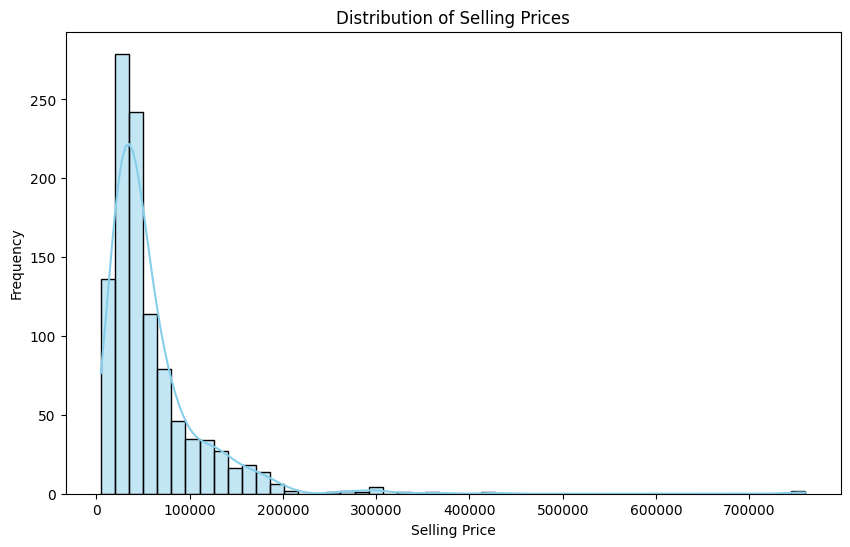

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram for selling_price
plt.figure(figsize=(10,6))
sns.histplot(df['selling_price'], bins=50, kde=True, color='skyblue')

plt.title("Distribution of Selling Prices")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.show()

#Question 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation.

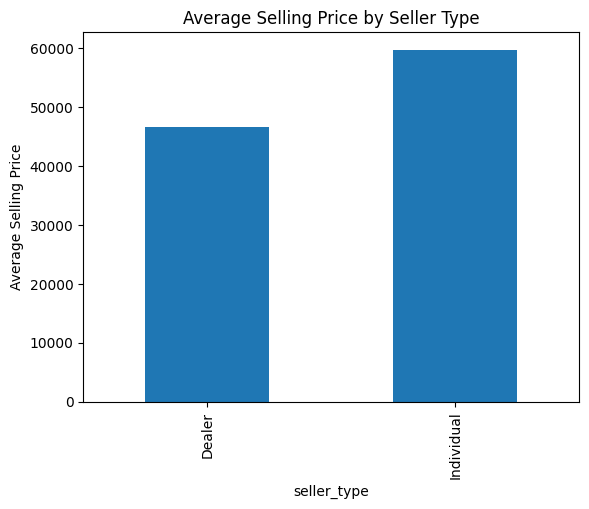

In [ ]:
# Bar plot of average selling price by seller_type
df.groupby("seller_type")["selling_price"].mean().plot(kind="bar")

plt.title("Average Selling Price by Seller Type")
plt.ylabel("Average Selling Price")
plt.show()


# Observation :-- Individual sellers tend to sell bikes at lower prices
# compared to dealers, who list bikes at higher average selling prices.

#Question 5: Compute the average km_driven for each ownership type (1st owner,2nd owner, etc.), and present the result as a bar plot.


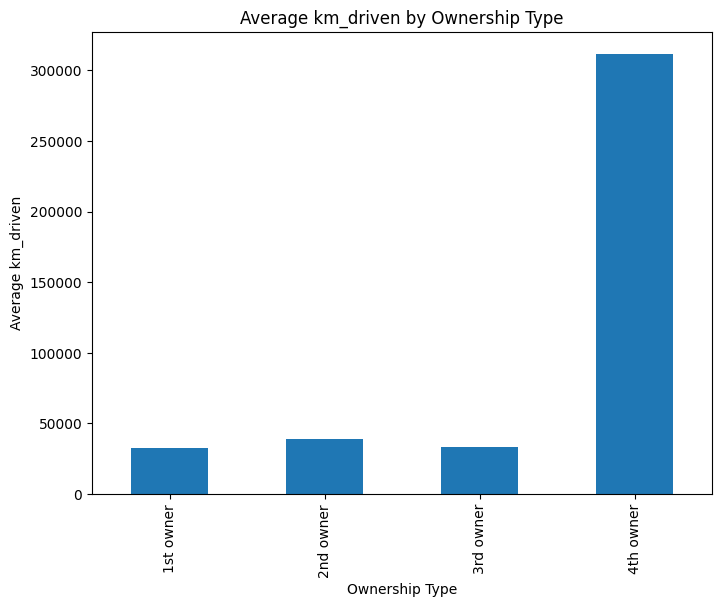

In [ ]:
# Compute average km_driven by ownership type
avg_km_by_owner = df.groupby("owner")["km_driven"].mean()

# Bar plot
avg_km_by_owner.plot(kind="bar", figsize=(8,6))

plt.title("Average km_driven by Ownership Type")
plt.ylabel("Average km_driven")
plt.xlabel("Ownership Type")
plt.show()

#Question 6: Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.


In [ ]:
# Statistics before removing outliers
print("Before removing outliers:\n")
print(df["km_driven"].describe())

# IQR method
Q1 = df["km_driven"].quantile(0.25)
Q3 = df["km_driven"].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[(df["km_driven"] >= lower_bound) & (df["km_driven"] <= upper_bound)]

# Summary statistics after removing outliers
print("\nAfter removing outliers:\n")
print(df_no_outliers["km_driven"].describe())

Before removing outliers:

count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

After removing outliers:

count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


#Question 7: Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.


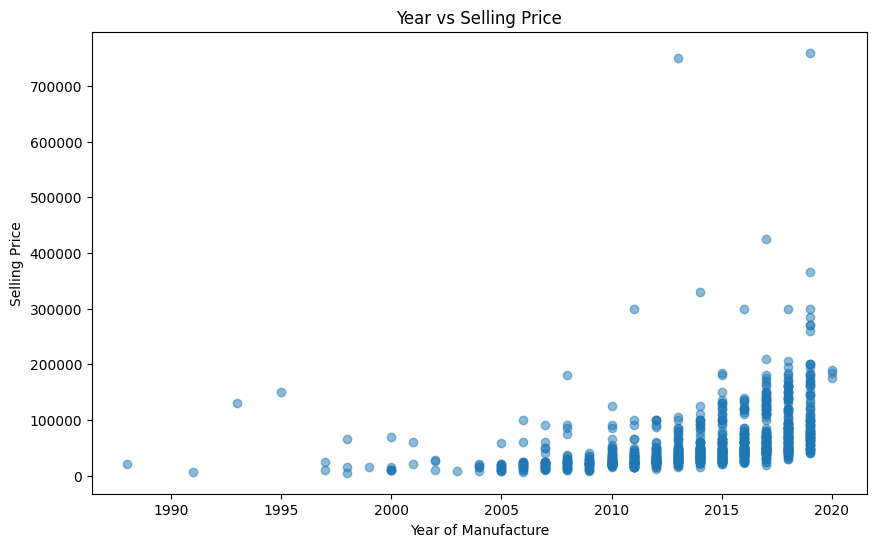

In [ ]:
# Scatter plot: year vs selling_price
plt.figure(figsize=(10,6))
plt.scatter(df["year"], df["selling_price"], alpha=0.5)

plt.title("Year vs Selling Price")
plt.xlabel("Year of Manufacture")
plt.ylabel("Selling Price")
plt.show()

#Question 8: Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.


In [ ]:
df_encoded = pd.get_dummies(df["seller_type"])
print(df_encoded.head())

   Dealer  Individual
0   False        True
1   False        True
2   False        True
3   False        True
4   False        True


#Question 9: Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?

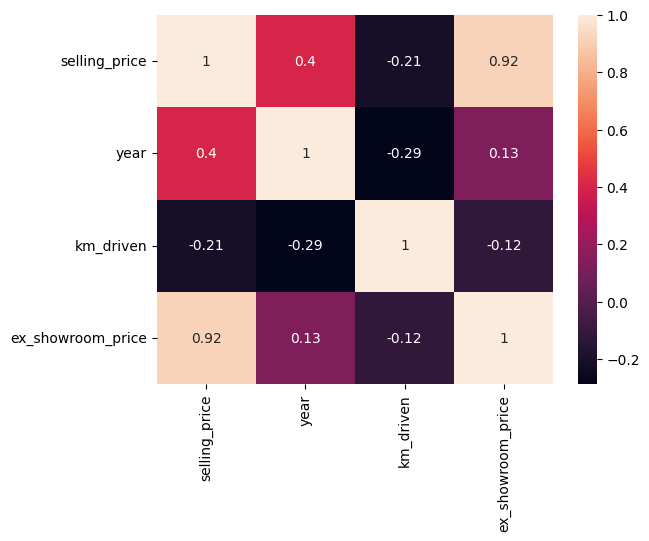

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()


#Question 10: Summarize your findings in a brief report :
A.  What are the most important factors affecting a bike's selling price?

B.  Mention any data cleaning or feature engineering you performed.


**Answer** :  A.  **Bike Price Analysis Report :**

Important factors for selling price:

1. Year of the bike - Newer bikes usually cost more.

2. Seller type - Dealers sell bikes at higher prices than individual sellers.

3. Km driven - More kilometers usually means a lower price.

4. Ownership - First-owner bikes sell for more than second or third-owner bikes.

**Answer** : B. **Data cleaning and preparation :**

1. Missing Values : Checked for missing values.

2. Outliers : Removed outliers in km_driven using the IQR method.

3. Encoding : Changed text columns like seller_type into numbers using one-hot encoding.

4. Visualization : Made plots to understand patterns in the data.

